In [273]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np

#偵測圓形

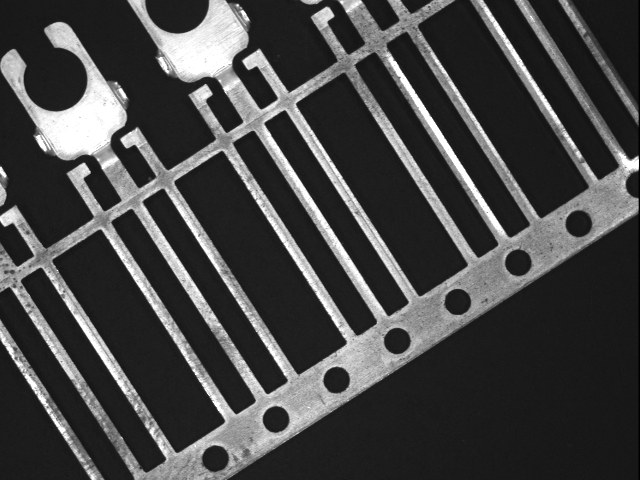

In [686]:
img = cv2.imread('/content/clp5.bmp')
img_gray = cv2.imread('/content/clp5.bmp', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

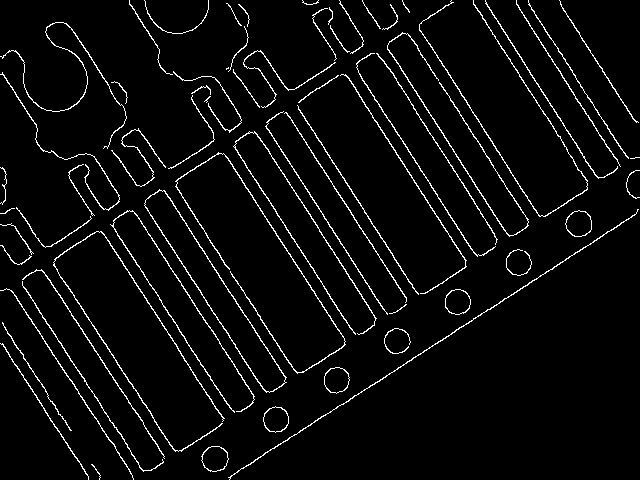

In [275]:
blurred = cv2.GaussianBlur(img_gray, (21, 21), 0)
edged = cv2.Canny(blurred, 60, 150)
cv2_imshow(edged)

圓數量:7
圓直徑:24.285714285714285


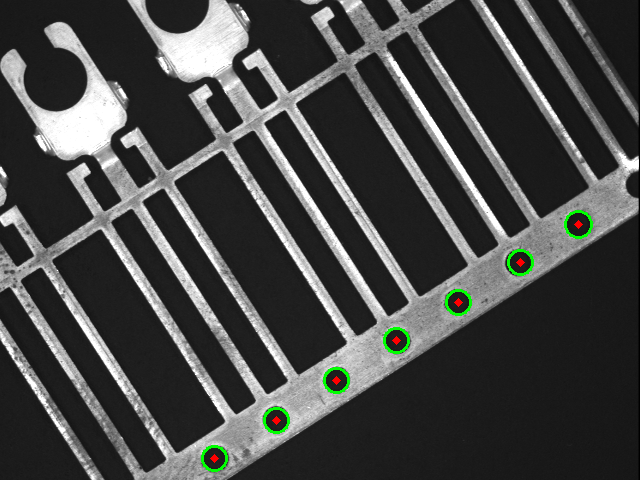

In [276]:
radius = 0

minDist = 10
param1 = 25 
param2 = 18 
minRadius = 11
maxRadius = 15 

circles = cv2.HoughCircles(edged, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    print("圓數量:" + str(circles.shape[1]))
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
        radius += i[2]
    print("圓直徑:" + str(2*radius/circles.shape[1]))

cv2_imshow(img)

#角度測量

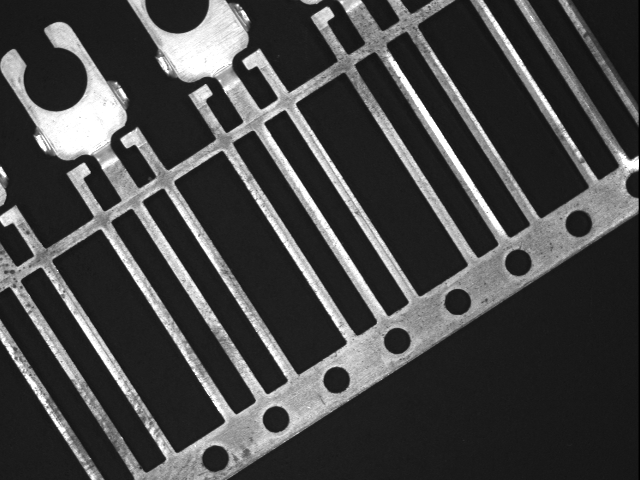

(480, 640, 3)


In [518]:
img = cv2.imread('/content/clp5.bmp')
img_gray = cv2.imread('/content/clp5.bmp', cv2.IMREAD_GRAYSCALE)

cv2_imshow(img_gray)
print(img.shape)

In [519]:
import math
from typing import NamedTuple
 
class Point(NamedTuple):
    x: int
    y: int

def angle(a: Point, b: Point, c: Point) -> float:
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

紅點座標:(89, 480)
綠點座標:(0, 341)
角度差距:32.6 or 57.4


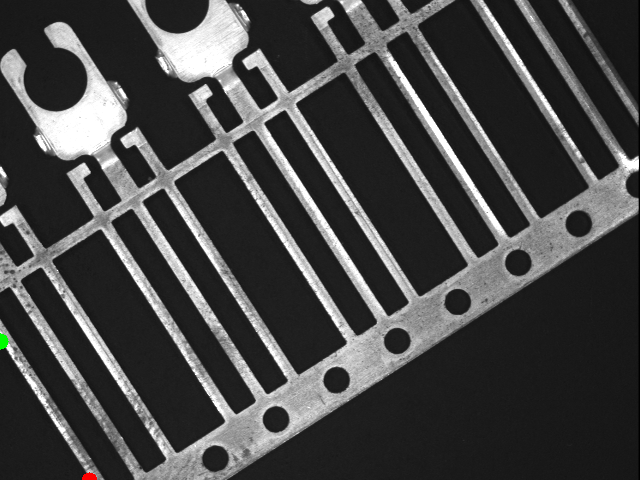

In [572]:
img = cv2.imread('/content/clp5.bmp')
img_gray = cv2.imread('/content/clp5.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(640):
  if img_gray[480-1][i] > 30:
    cv.circle(img,(i,480), 8, (0,0,255), -1)
    first_position = (i, 480)
    print("紅點座標:" + str(first_position))
    break

for i in range(480):
  if img_gray[479-i][0] > 30:
    cv.circle(img,(0, 479-i), 8, (0,255,0), -1)
    second_position = (0, 479-i)
    print("綠點座標:" + str(second_position))
    break

angle = round(angle(first_position, second_position, (0,480)), 1)

print("角度差距:" + str(angle) + " or " + str(90 - angle))

cv2_imshow(img)

#寬度測量

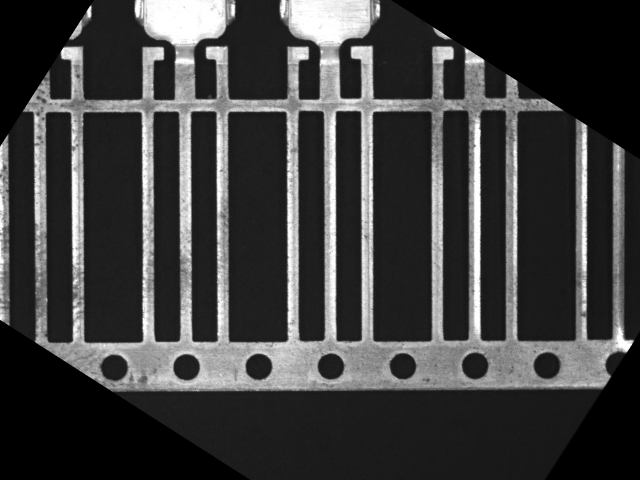

In [684]:
img = cv2.imread('/content/clp5.jpg')
height, width = img.shape[:2] 
center = (width/2, height/2)
  
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=-angle, scale=1) #用剛才測的角度把圖片轉正 
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))

cv2_imshow(rotated_image)

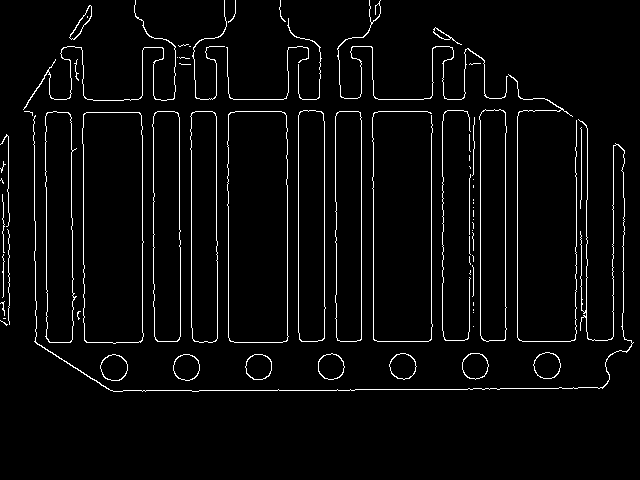

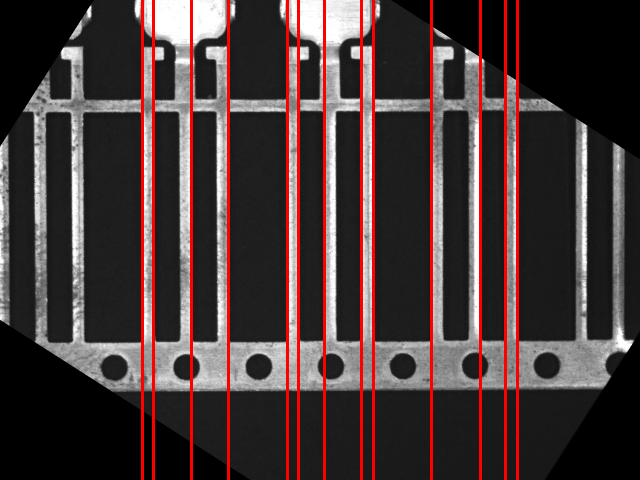

兩線寬度由左到右:[11, 38, 37, 59, 11, 26, 37, 12, 58, 49, 25, 12]


In [685]:
line_list = []
distance = []

edges = cv.Canny(blurred,10,150,apertureSize = 3)
cv2_imshow(edges)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    if x1*x2 < 0: #不畫垂直線
      continue
    cv.line(rotated_image,(x1,y1),(x2,y2),(0,0,255),2)
    line_list.append(x1)

cv2_imshow(rotated_image)

line_list.sort()
for i in range(len(line_list)-1):
  distance.append(line_list[i+1]-line_list[i])

print("兩線寬度由左到右:" + str(distance))